# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Loading the dataset

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### The data set have 10 numerical and 1 object feature

In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

### No null values

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [7]:
numerical_features

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [8]:
categorical_features

['Fuel_Type']

In [9]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [10]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

## Calculating the mean of the numerical features

In [13]:
for feature in numerical_features:
    print(f'The mean of the feature {feature} is {round(df[feature].mean(),2)}')
    print(f'The median of the feature {feature} is {round(df[feature].median(),2)}')
    print('-' * 60)

The mean of the feature Price is 10730.82
The median of the feature Price is 9900.0
------------------------------------------------------------
The mean of the feature Age_08_04 is 55.95
The median of the feature Age_08_04 is 61.0
------------------------------------------------------------
The mean of the feature KM is 68533.26
The median of the feature KM is 63389.5
------------------------------------------------------------
The mean of the feature HP is 101.5
The median of the feature HP is 110.0
------------------------------------------------------------
The mean of the feature Automatic is 0.06
The median of the feature Automatic is 0.0
------------------------------------------------------------
The mean of the feature cc is 1576.86
The median of the feature cc is 1600.0
------------------------------------------------------------
The mean of the feature Doors is 4.03
The median of the feature Doors is 4.0
------------------------------------------------------------
The mean o

## Observation
- Mean , median of **KM** , **Weight** feature have huge difference this is due to the outliers
- This can affect the training processes of the model
- So, we need to handle this outliers

---

## Ploting the numerical features to check if outliers are present or not

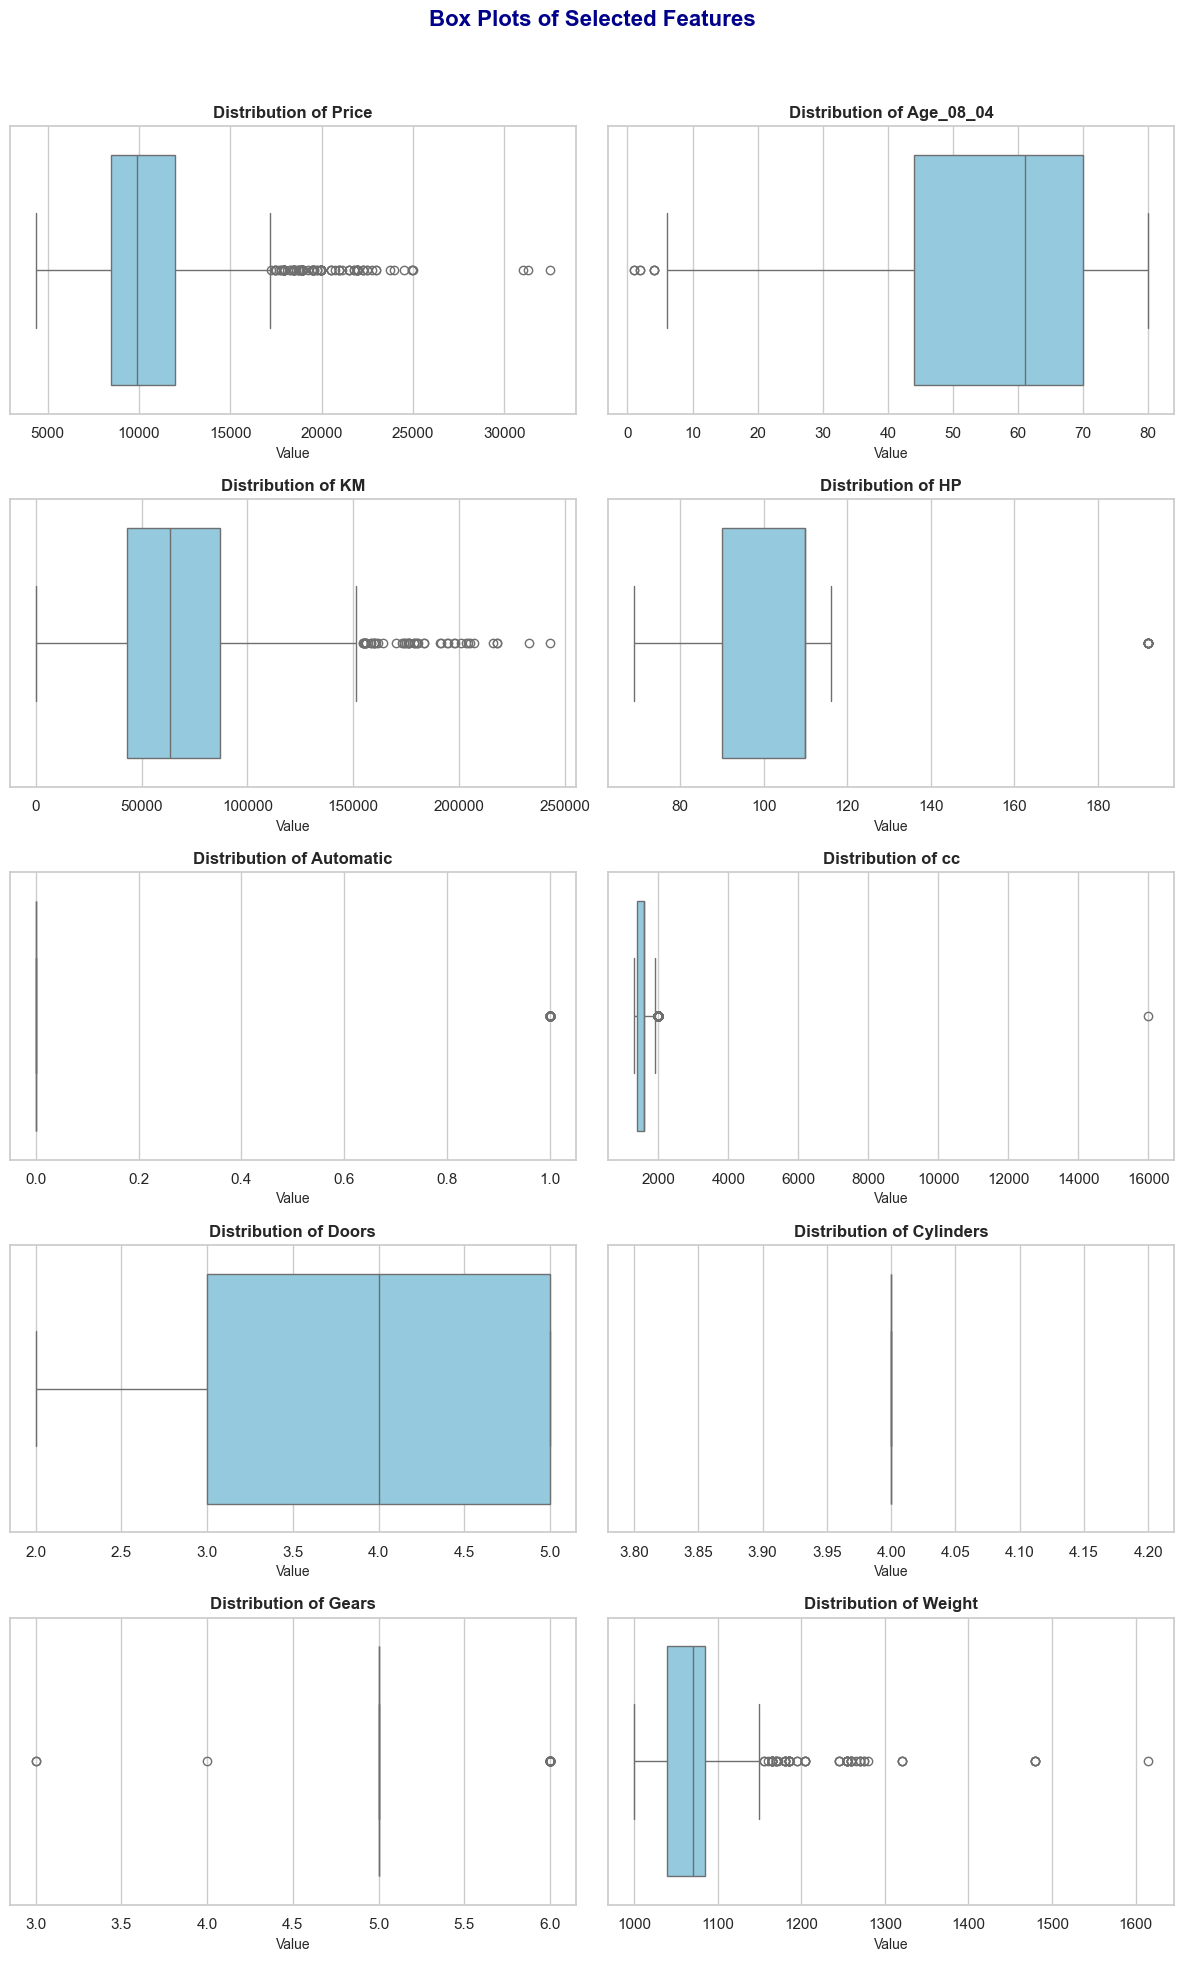

In [ ]:
sns.set(style="whitegrid")
#Main figure size
plt.figure(figsize=(12, 20))

#Plot title
plt.suptitle("Box Plots of Selected Features", fontsize=16, fontweight='bold', color='darkblue')

#Loop to plot the subplots of each numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f"Distribution of {feature}", fontsize=12, fontweight='semibold')   
    plt.xlabel("Value", fontsize=10)
    plt.ylabel("")
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Observations
- Almost every numerical feature have outliers
---

## Outliers detection and Handling

In [14]:
# Loop through each columns
for feature in numerical_features:  
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers in the feature
        outlier_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        
        print(f"\nFeature: '{feature}' has {outlier_count} outliers.")
        print('-' * 60)


Feature: 'Price' has 110 outliers.
------------------------------------------------------------

Feature: 'Age_08_04' has 7 outliers.
------------------------------------------------------------

Feature: 'KM' has 49 outliers.
------------------------------------------------------------

Feature: 'HP' has 11 outliers.
------------------------------------------------------------

Feature: 'Automatic' has 80 outliers.
------------------------------------------------------------

Feature: 'cc' has 123 outliers.
------------------------------------------------------------

Feature: 'Doors' has 0 outliers.
------------------------------------------------------------

Feature: 'Cylinders' has 0 outliers.
------------------------------------------------------------

Feature: 'Gears' has 46 outliers.
------------------------------------------------------------

Feature: 'Weight' has 66 outliers.
------------------------------------------------------------


## Observations:
- Except few features, most of them have large number of outliers.
- So, simply dropping them won't be a feasible option
- We have to handle this outliers rather dropping them

---

In [15]:
#Loop over each features
for feature in numerical_features:
    #Calculate 25th percentile
    Q1 = df[feature].quantile(0.25)
    
    #Calculate 75th percentile
    Q3 = df[feature].quantile(0.75)
    
    #Calculate Inter Quatile Range
    IQR = Q3 - Q1
        
    # Calculate the lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # Apply capping
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    
    print(f"\nReplaced the values of '{feature}' which are smaller than {lower_bound} by '{lower_bound}'\nReplaced the values of '{feature}' which greater than {upper_bound} by '{upper_bound}'")
    print('-' * 60)


Replaced the values of 'Price' which are smaller than 3200.0 by '3200.0'
Replaced the values of 'Price' which greater than 17200.0 by '17200.0'
------------------------------------------------------------

Replaced the values of 'Age_08_04' which are smaller than 5.0 by '5.0'
Replaced the values of 'Age_08_04' which greater than 109.0 by '109.0'
------------------------------------------------------------

Replaced the values of 'KM' which are smaller than -23031.125 by '-23031.125'
Replaced the values of 'KM' which greater than 153051.875 by '153051.875'
------------------------------------------------------------

Replaced the values of 'HP' which are smaller than 60.0 by '60.0'
Replaced the values of 'HP' which greater than 140.0 by '140.0'
------------------------------------------------------------

Replaced the values of 'Automatic' which are smaller than 0.0 by '0.0'
Replaced the values of 'Automatic' which greater than 0.0 by '0.0'
---------------------------------------------

## Checking If outliers have been handled or not

In [16]:
# Loop through each columns
for feature in numerical_features:  
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers in the feature
        outlier_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        
        print(f"\nFeature: {feature} has {outlier_count} outliers.")
        print('-' * 60)


Feature: Price has 0 outliers.
------------------------------------------------------------

Feature: Age_08_04 has 0 outliers.
------------------------------------------------------------

Feature: KM has 0 outliers.
------------------------------------------------------------

Feature: HP has 0 outliers.
------------------------------------------------------------

Feature: Automatic has 0 outliers.
------------------------------------------------------------

Feature: cc has 0 outliers.
------------------------------------------------------------

Feature: Doors has 0 outliers.
------------------------------------------------------------

Feature: Cylinders has 0 outliers.
------------------------------------------------------------

Feature: Gears has 0 outliers.
------------------------------------------------------------

Feature: Weight has 0 outliers.
------------------------------------------------------------


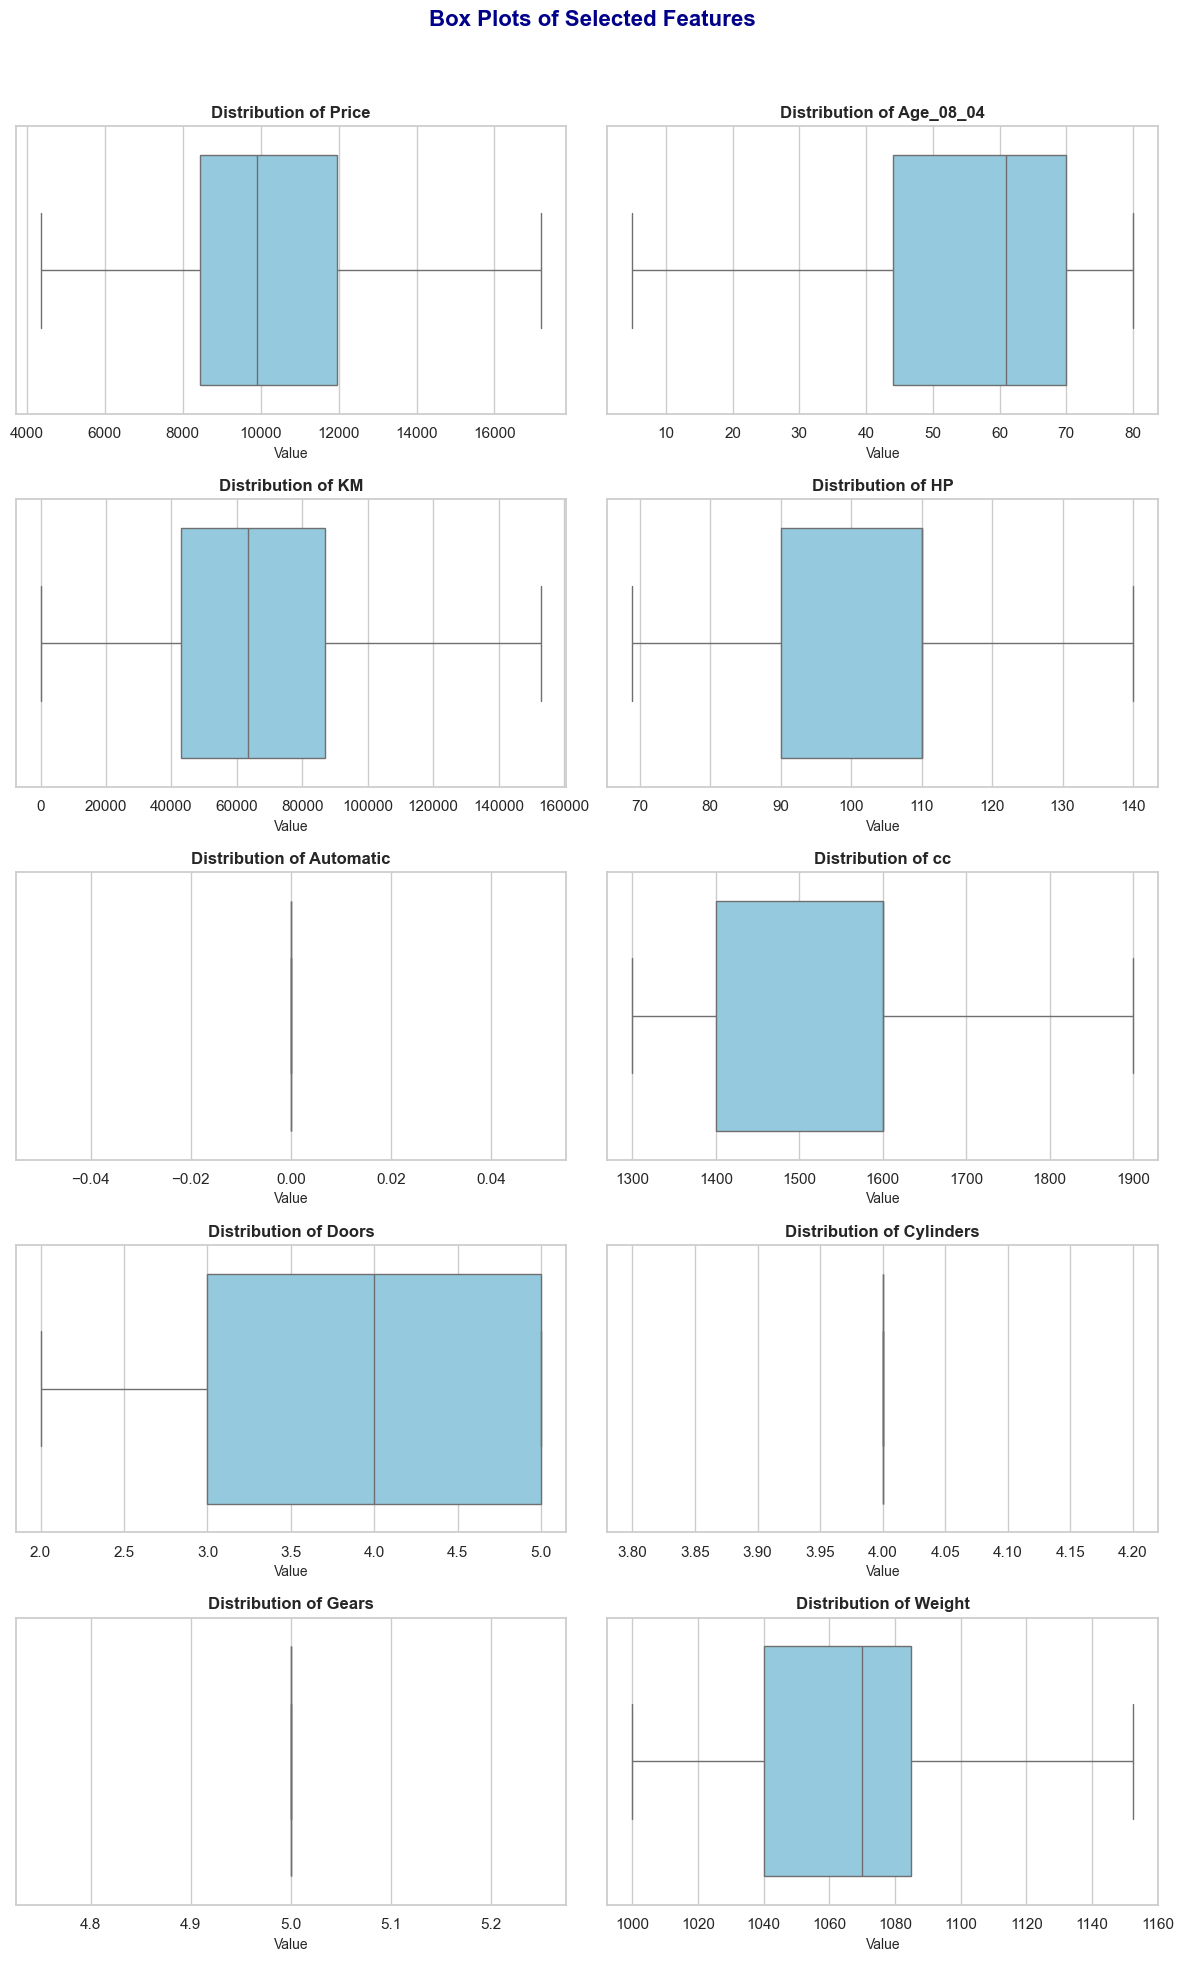

In [18]:
sns.set(style="whitegrid")
#Main figure size
plt.figure(figsize=(12, 20))

#Plot title
plt.suptitle("Box Plots of Selected Features", fontsize=16, fontweight='bold', color='darkblue')

#Loop to plot the subplots of each null features
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f"Distribution of {feature}", fontsize=12, fontweight='semibold')   
    plt.xlabel("Value", fontsize=10)
    plt.ylabel("")
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Observation
- Outliers have been removed successfully
---

## Statistical Summary

In [19]:
summary = pd.DataFrame()

# Calculating measures of central tendency
summary['Mean'] = df[numerical_features].mean()
summary['Median'] = df[numerical_features].median()

# Calculating measures of dispersion
summary['Standard Deviation'] = df[numerical_features].std()
summary['Interquartile Range (IQR)'] = df[numerical_features].quantile(0.75) - df[numerical_features].quantile(0.25)

In [20]:
summary

,Mean,Median,Standard Deviation,Interquartile Range (IQR)
Price,10500.633008,9900.0,2981.813672,3500.00
Age_08_04,55.958914,61.0,18.566512,26.00
KM,67604.873172,63389.5,34738.595454,44020.75
HP,101.103760,110.0,13.147450,20.00
Automatic,0.000000,0.0,0.000000,0.00
cc,1558.565460,1600.0,168.970222,200.00
Doors,4.033426,4.0,0.952677,2.00
Cylinders,4.000000,4.0,0.000000,0.00
Gears,5.000000,5.0,0.000000,0.00
Weight,1068.579387,1070.0,37.774625,45.00


### Key Insights

1. **Price**: The average price is 10,500, but with a high standard deviation, indicating significant price variability. The mean is higher than the median, suggesting a right-skewed distribution.

2. **Age**: Most vehicles are around 56 months old, with a moderate spread. The median age is slightly higher than the mean, showing a balanced age distribution with some variation.

3. **Kilometers (KM)**: Kilometers driven show high variability, with an average of 67,604. This wide range suggests diverse usage patterns among vehicles.

4. **Horsepower (HP)**: Average horsepower is 101, with a slight left skew (median slightly higher than the mean), indicating a few lower values.

5. **Automatic Transmission**: All vehicles are manual, as indicated by a mean and median of zero for `Automatic`.

6. **Engine Capacity (cc)**: The mean and median are close, indicating a fairly symmetric distribution around 1,558 cc with moderate variability.

7. **Doors, Cylinders, and Gears**: These features show minimal to no variation; most cars have 4 doors, 4 cylinders, and 5 gears, indicating consistency across the dataset.

8. **Weight**: The vehicle weight is centered around 1,068 kg, with low variability, suggesting a consistent weight range for these vehicles.
---

## Histrograms

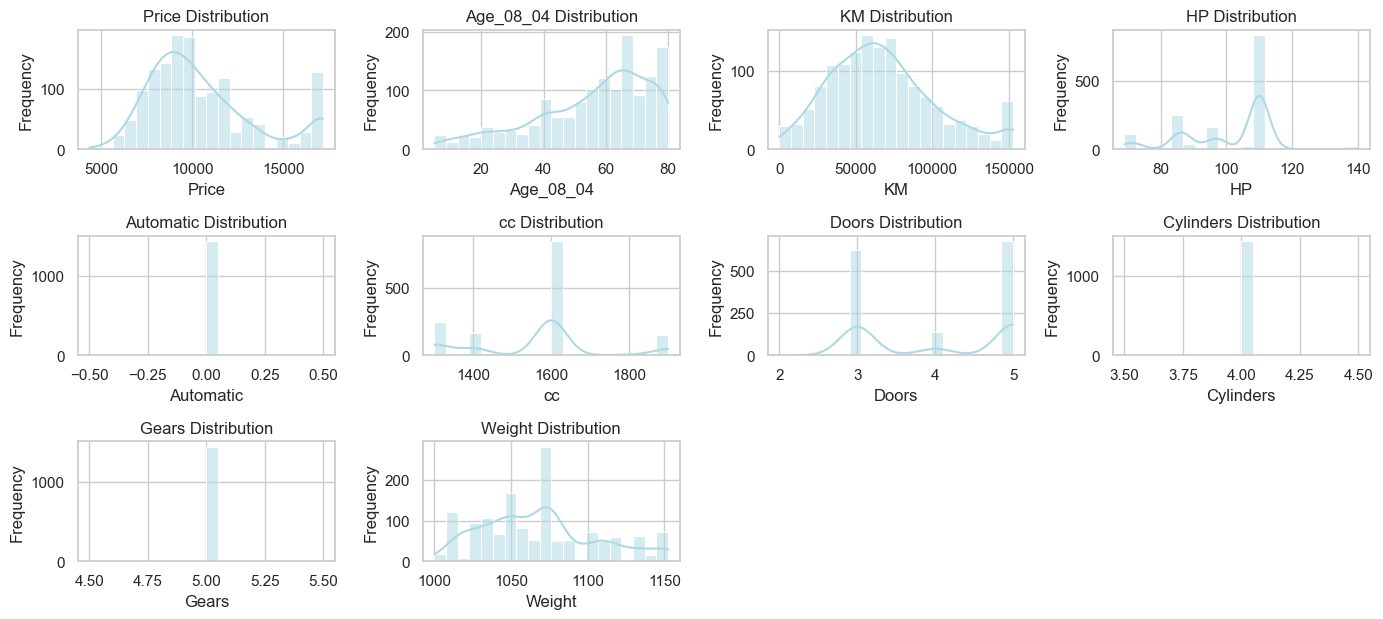

In [22]:
# Plotting histograms for each feature in the DataFrame
plt.figure(figsize=(14, 10))

# Loop through each feature to create histograms
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.histplot(df[feature], kde=True, color='lightblue', bins=20)  
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Observations
1. **Price**: The distribution is right-skewed, with most vehicles priced around 10,000 and a few high-priced outliers.

2. **Age (Months)**: Slight right skew, with most vehicles aged between 40 and 70 months, indicating a relatively older set of vehicles.

3. **Kilometers (KM)**: Right-skewed distribution, suggesting that most vehicles have lower mileage, but there are a few with significantly higher mileage.

4. **Horsepower (HP)**: Bimodal distribution with peaks around 100 and 120 HP, indicating two common horsepower ranges.

5. **Automatic**: All values are zero, so the dataset only contains manual vehicles.

6. **Engine Capacity (cc)**: Bimodal, with peaks around 1400 and 1600 cc, suggesting common engine sizes.

7. **Doors**: Most vehicles have 4 doors, with a smaller number of 3 and 5-door vehicles.

8. **Cylinders**: All vehicles have 4 cylinders, indicating a uniform dataset in this aspect.

9. **Gears**: All vehicles have 5 gears, showing no variation in this feature.

10. **Weight**: Moderate spread, with most vehicles around 1050 kg, suggesting a relatively consistent weight range across the dataset.

---


## Box Plots

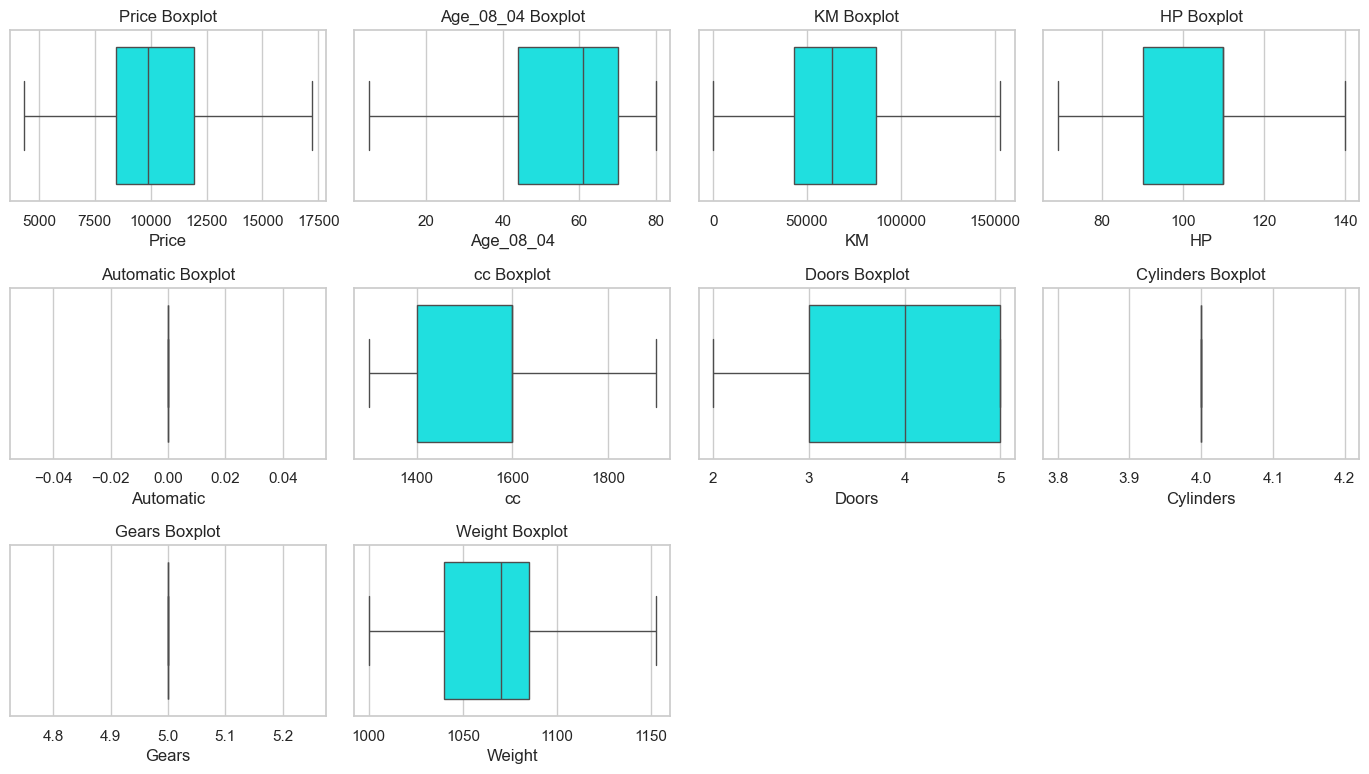

In [23]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[feature], color='cyan')
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

## Observations 
- **Strong Negative Correlation**:
  - `Price` and `Age_08_04`: High negative correlation (-0.90). Older cars are priced lower.
  - `Price` and `KM`: Moderate negative correlation (-0.61). More kilometers driven results in a lower price.
- **Moderate Positive Correlation**:
  - `Weight` and `Price`: Weight is moderately positively correlated with price (0.51).
  - `Weight` and `cc`: Engine capacity (`cc`) is positively correlated with weight (0.72).
- **Weak or No Correlation**:
  - Features such as `Automatic`, `Doors`, and `Cylinders` show minimal correlation with `Price` and other variables.
  ---

## HeatMap

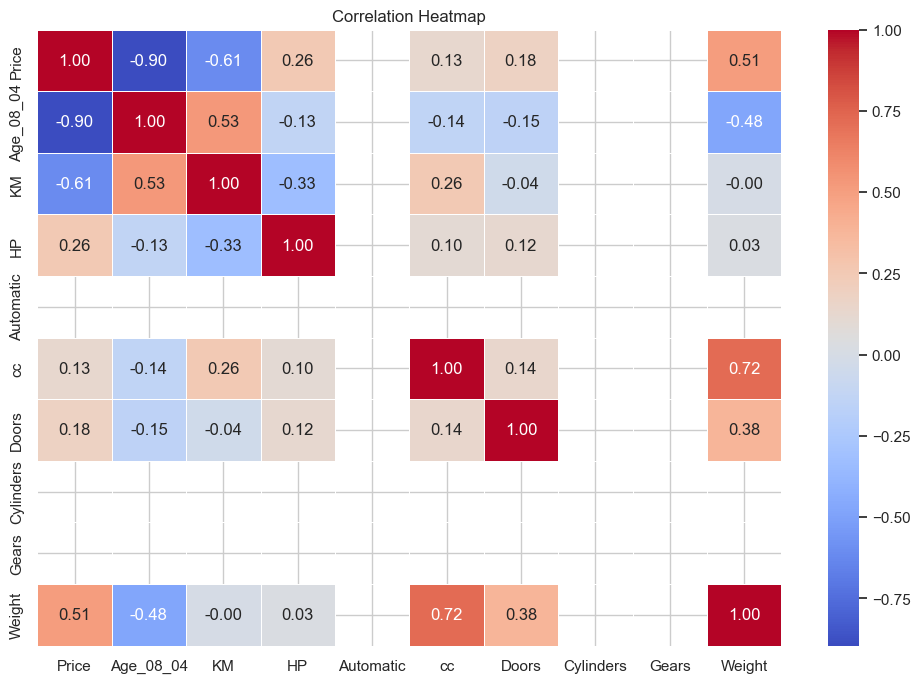

In [24]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Observations
- **Price**: 
  - Prices mostly range between 7500 and 12500, with no significant outliers.
- **Age_08_04**: 
  - Car ages range widely from 20 to 80 months, with no visible outliers.
- **KM (Kilometers Driven)**: 
  - Mileage varies significantly, ranging from near 0 to above 150,000.
- **HP (Horsepower)**: 
  - Most cars have horsepower in the range of 80 to 140.
- **cc (Engine Capacity)**: 
  - Displays a slightly wider spread between 1400 and 1800.
- **Doors**: 
  - Cars typically have 3 to 5 doors, with no significant outliers.
- **Automatic and Cylinders**: 
  - These variables show almost no variance, suggesting most cars have 0 for ``Automatic`` (manual transmission) and 4 cylinders.
- **Gears**: 
  - Most cars appear to have 5 gears.
- **Weight**: 
  - Car weight distribution is concentrated between 1000 to 1150, with no visible outliers.

---

## Pair Plots

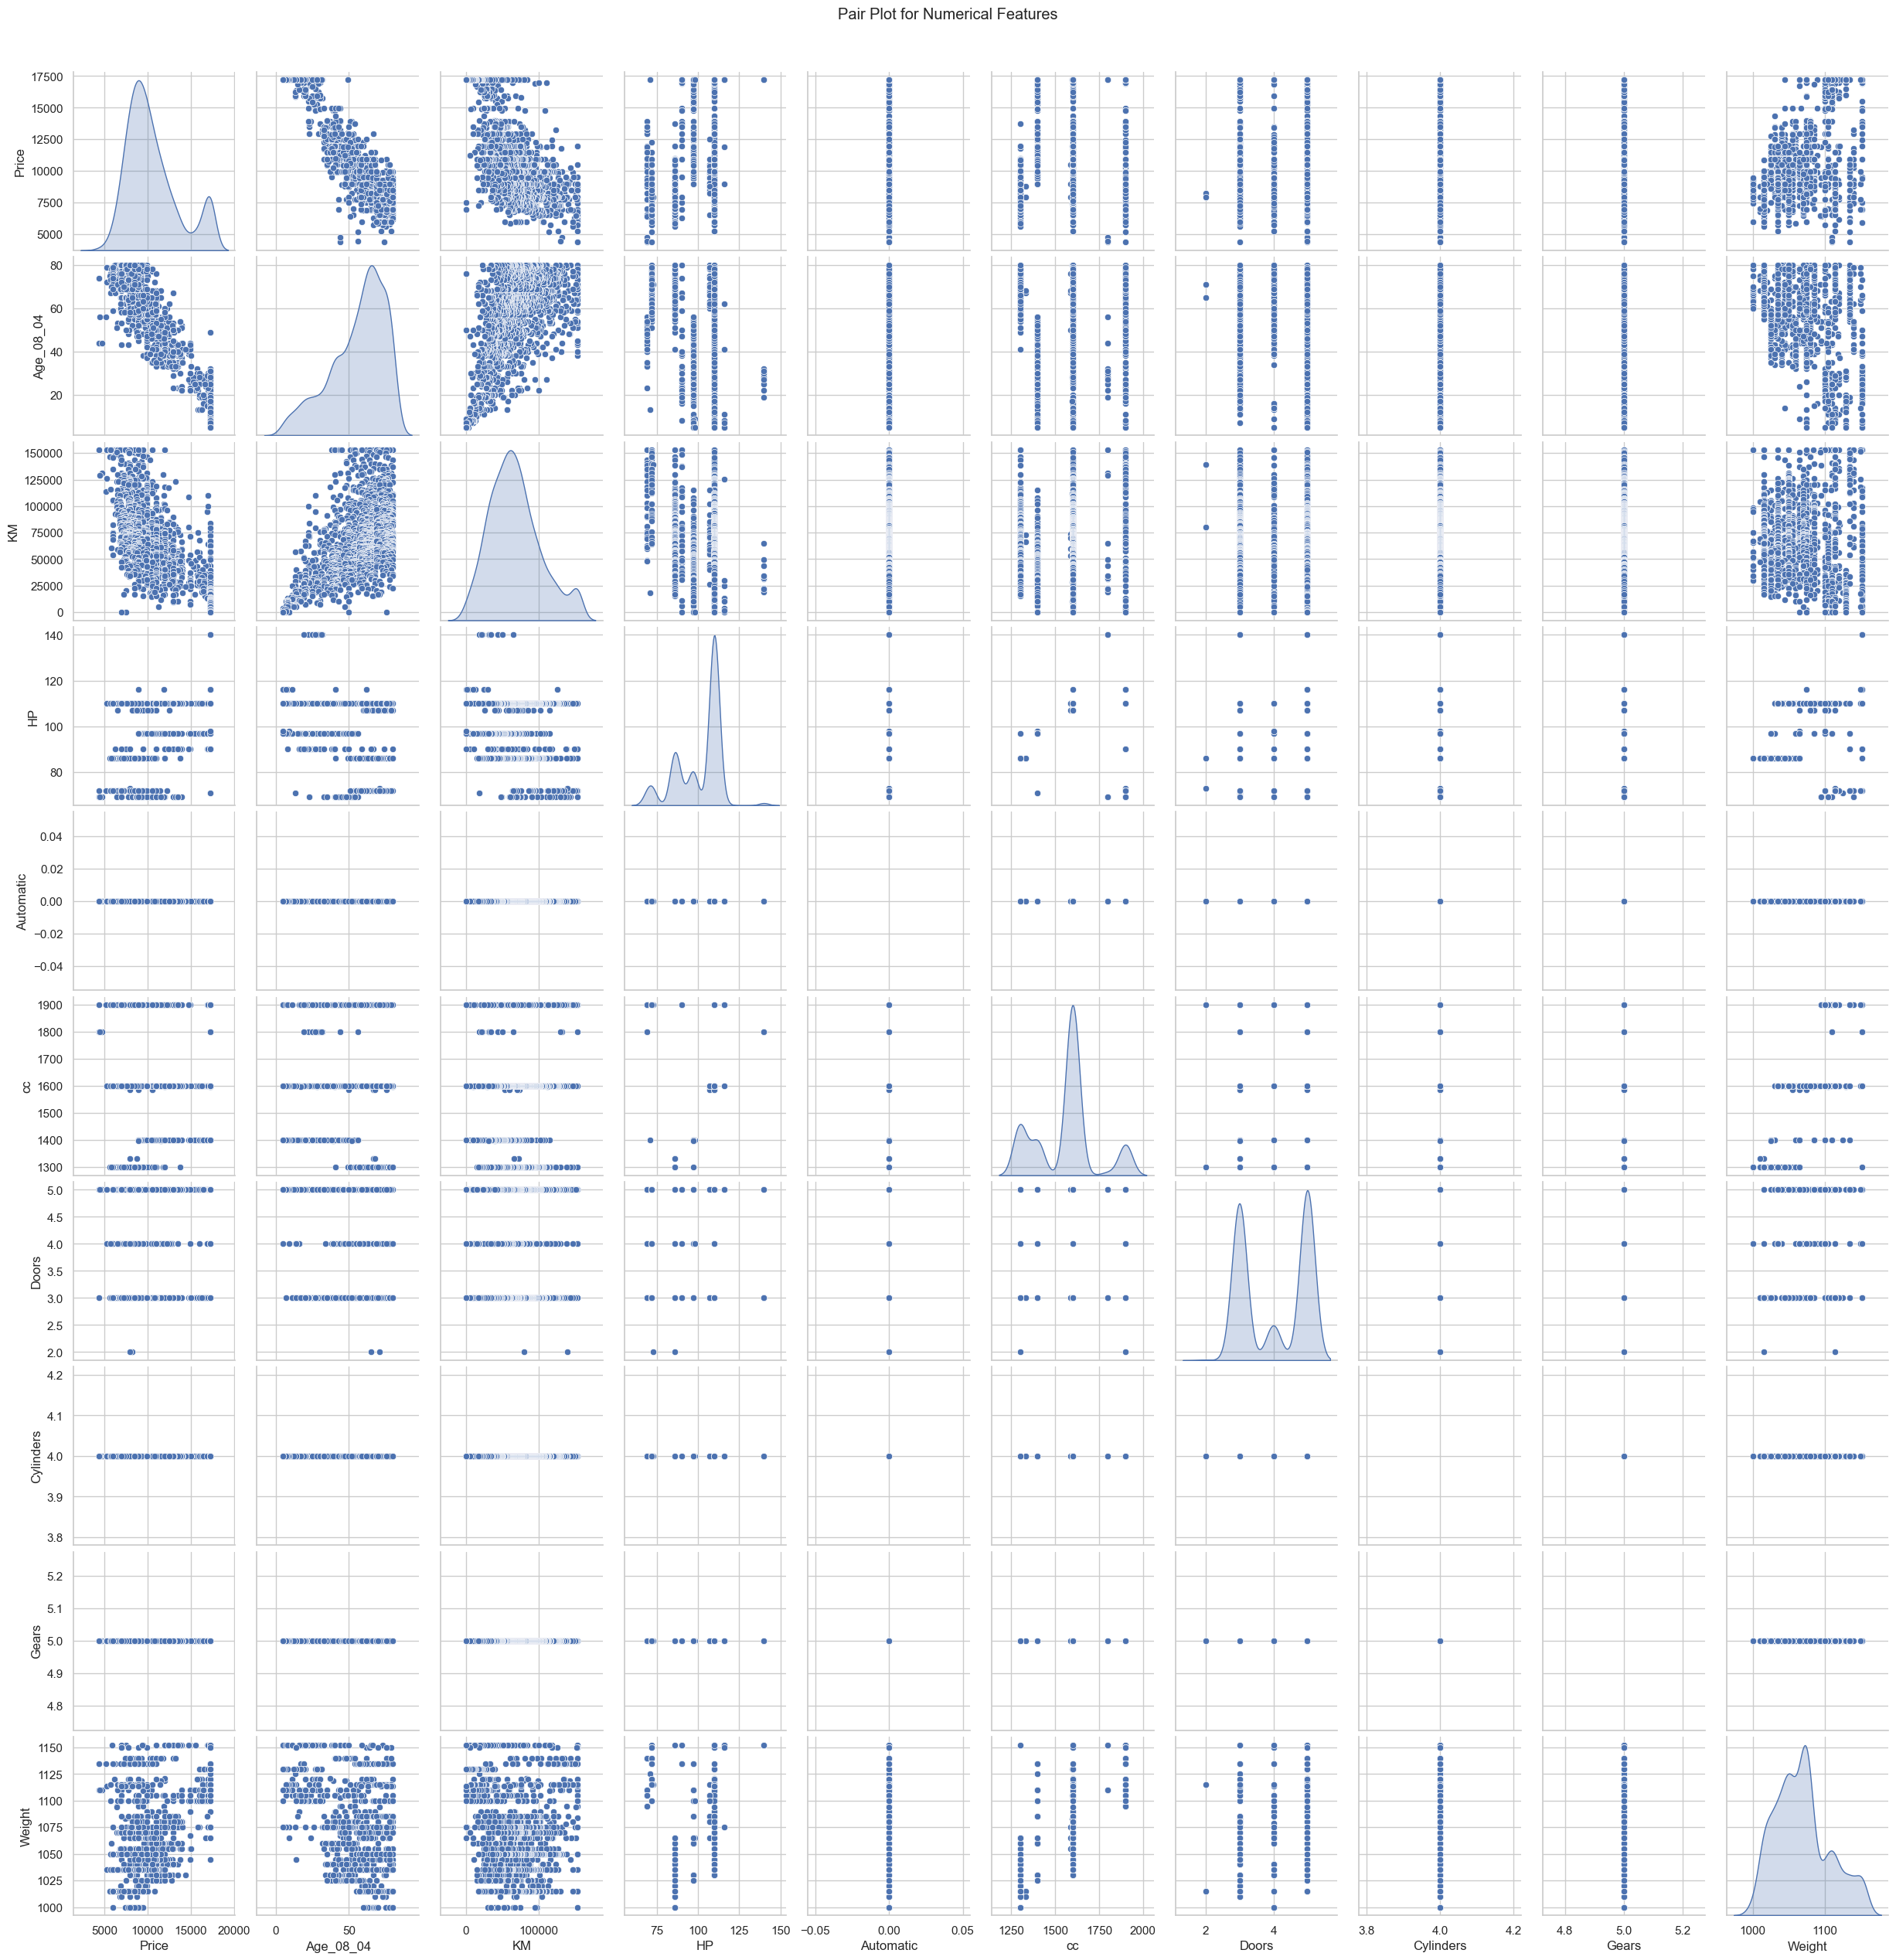

In [26]:
sns.pairplot(df[numerical_features], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

## Density Plot

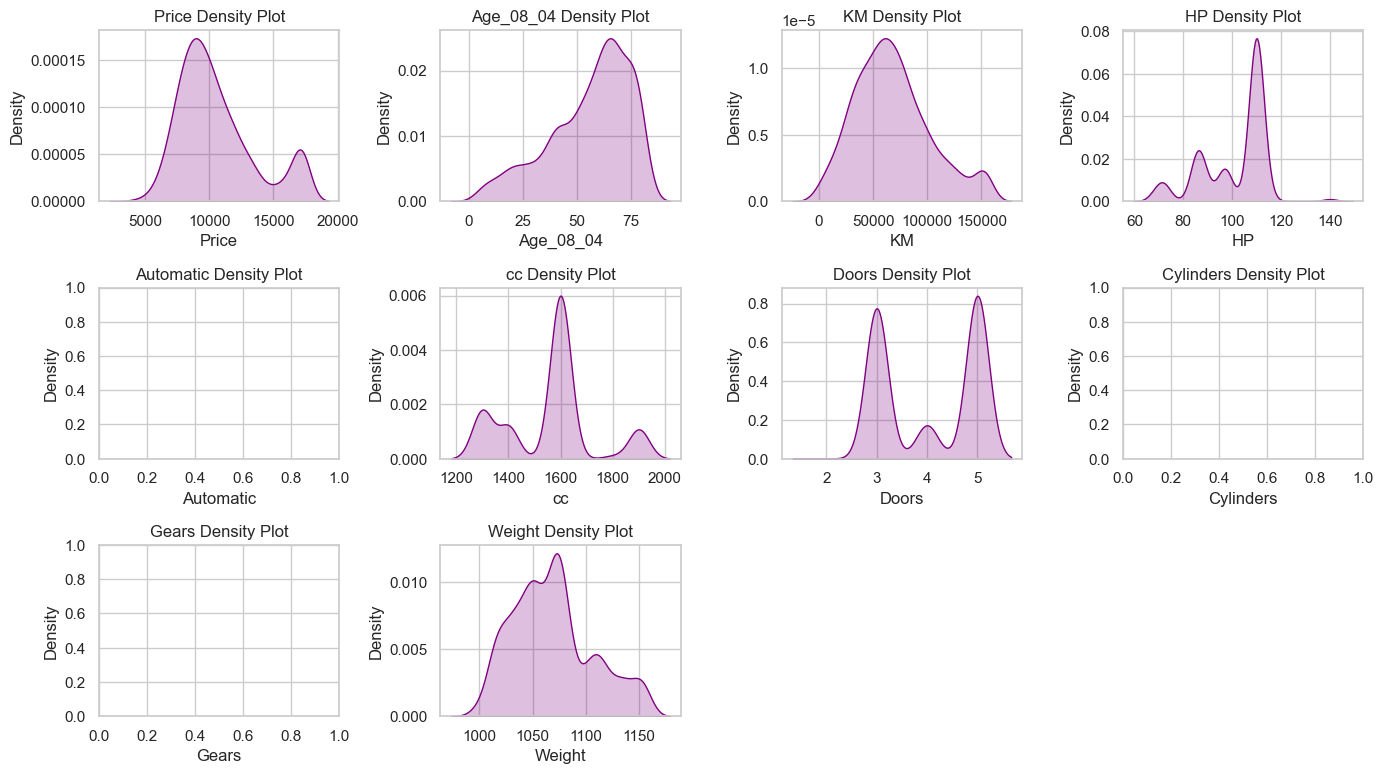

In [27]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[feature], fill=True, color='purple')
    plt.title(f'{feature} Density Plot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [29]:
categorical_features

['Fuel_Type']

In [35]:
list(df[categorical_features].value_counts().index)

[('Petrol',), ('Diesel',), ('CNG',)]

# Categorical Plots

## Bar Plots

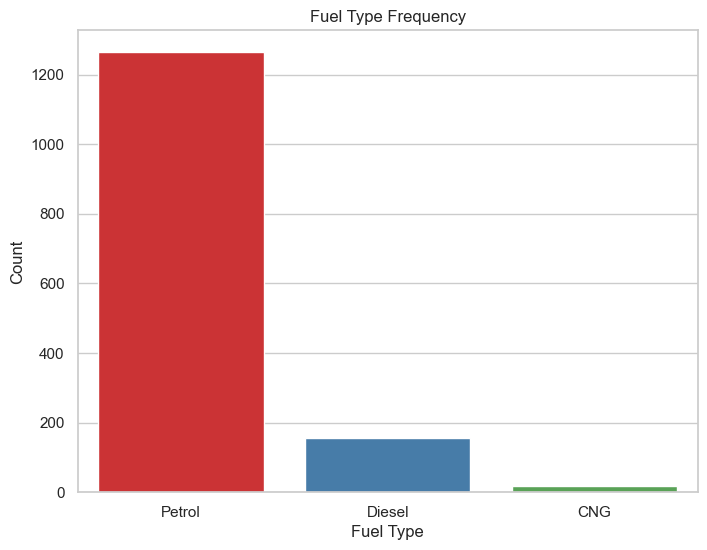

In [ ]:

plt.figure(figsize=(8, 6))
sns.barplot(x=df['Fuel_Type'].value_counts().index, y=df['Fuel_Type'].value_counts().values, palette='Set1')
plt.title('Fuel Type Frequency')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


## Pie

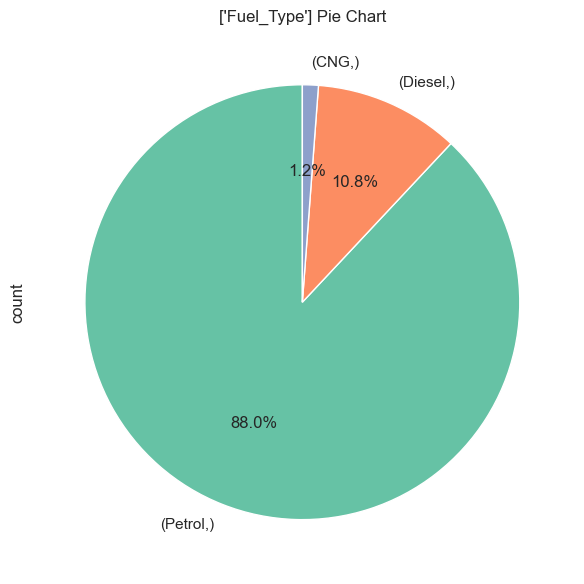

In [41]:
# 4. Pie Charts for Categorical Variables
plt.figure(figsize=(14, 6))
df[categorical_features].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', n_colors=6), ax=plt.gca())
plt.title(f'{categorical_features} Pie Chart')

plt.tight_layout()
plt.show()

# Violin

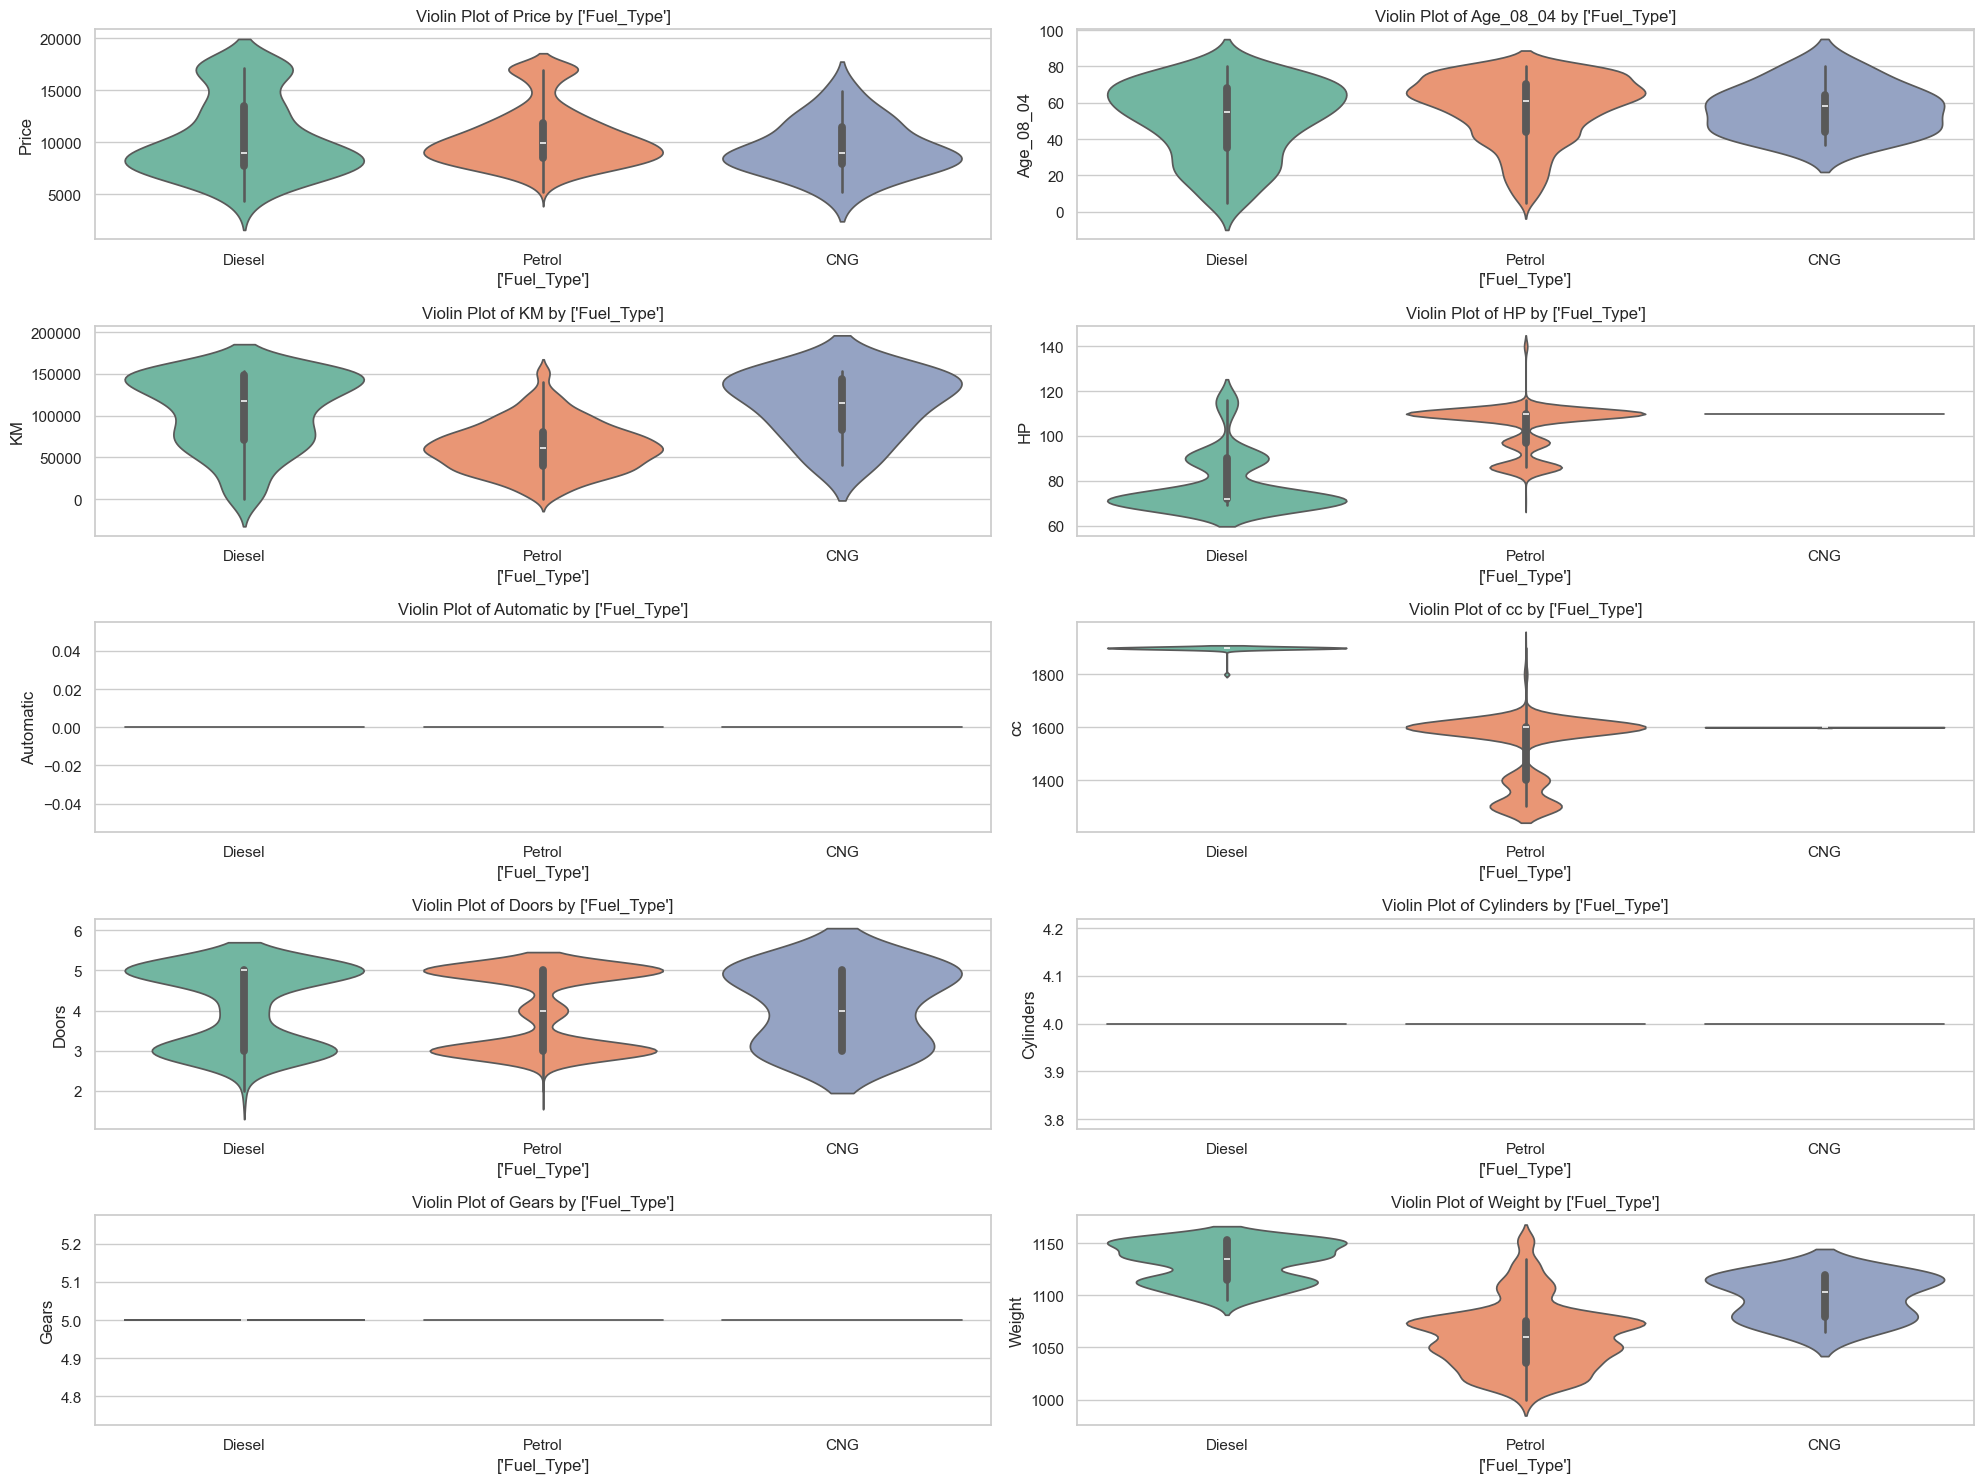

In [ ]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(x=df[categorical_features[0]], y=df[feature], palette='Set2')  # Corrected to use each feature
    plt.title(f'Violin Plot of {feature} by {categorical_features}')
    plt.xlabel(f'{categorical_features}')
    plt.ylabel(f'{feature}')
    plt.tight_layout()

plt.show()


## Label Encoding

In [52]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5


In [54]:
df = pd.get_dummies(df,columns=['Fuel_Type'], dtype='int')

In [55]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0


## Saving the cleaned file

In [57]:
df.to_csv('Cleaned_ToyotaData.csv',index= False)